# Data exploration #3


In [7]:
import tensorflow as tf
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
import plotly.figure_factory as ff
import datetime
import numpy as np
import pandas as pd
import os
import sys
import plotly.plotly as py
from plotly import tools
import numpy as np
import cufflinks
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


# Using plotly + cufflinks in offline mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.preparation import csvInterface
from src.processing import dataProc


### Loading & Trimming:

In [15]:
CSV_PATH = module_path + "/data/raw/routes.csv"


dataset = pd.read_csv(
    CSV_PATH, sep='	', low_memory=False)


cols = ['source_latitude', 'source_longitude', 'source_address',
        'destination_address', 'passenger_id', 'destination_latitude', 'destination_longitude']

dataset.drop(cols, axis=1, inplace=True)
dataset = dataset.sort_values('request_date')
dataset['request_date'] = dataset['request_date'].apply(lambda x: pd.Timestamp(x))
dataset.isnull().sum()

request_date    0
dtype: int64

### Aggregation:

In [19]:

# 1 ride == 1 volume unit
dataset['ride_volume'] = 1

dt_agg15min = dataProc.aggregate_by_mins(dataset=dataset, datetime_column='request_date', minutes=15 )
outliers_15min = dataProc.z_detect_outliers(values= dt_agg15min['ride_volume'], threshold= 3 )

dt_agg1hour = dataProc.aggregate_by_hours(dataset=dataset, datetime_column='request_date', hours= 1)
outliers_1h = dataProc.z_detect_outliers(values= dt_agg1hour['ride_volume'], threshold= 3 )

dt_agg15min

900


,ride_volume
request_date,
2015-09-01 00:00:00,190
2015-09-01 00:15:00,202
2015-09-01 00:30:00,153
2015-09-01 00:45:00,164
2015-09-01 01:00:00,128
2015-09-01 01:15:00,116
2015-09-01 01:30:00,122
2015-09-01 01:45:00,114
2015-09-01 02:00:00,127


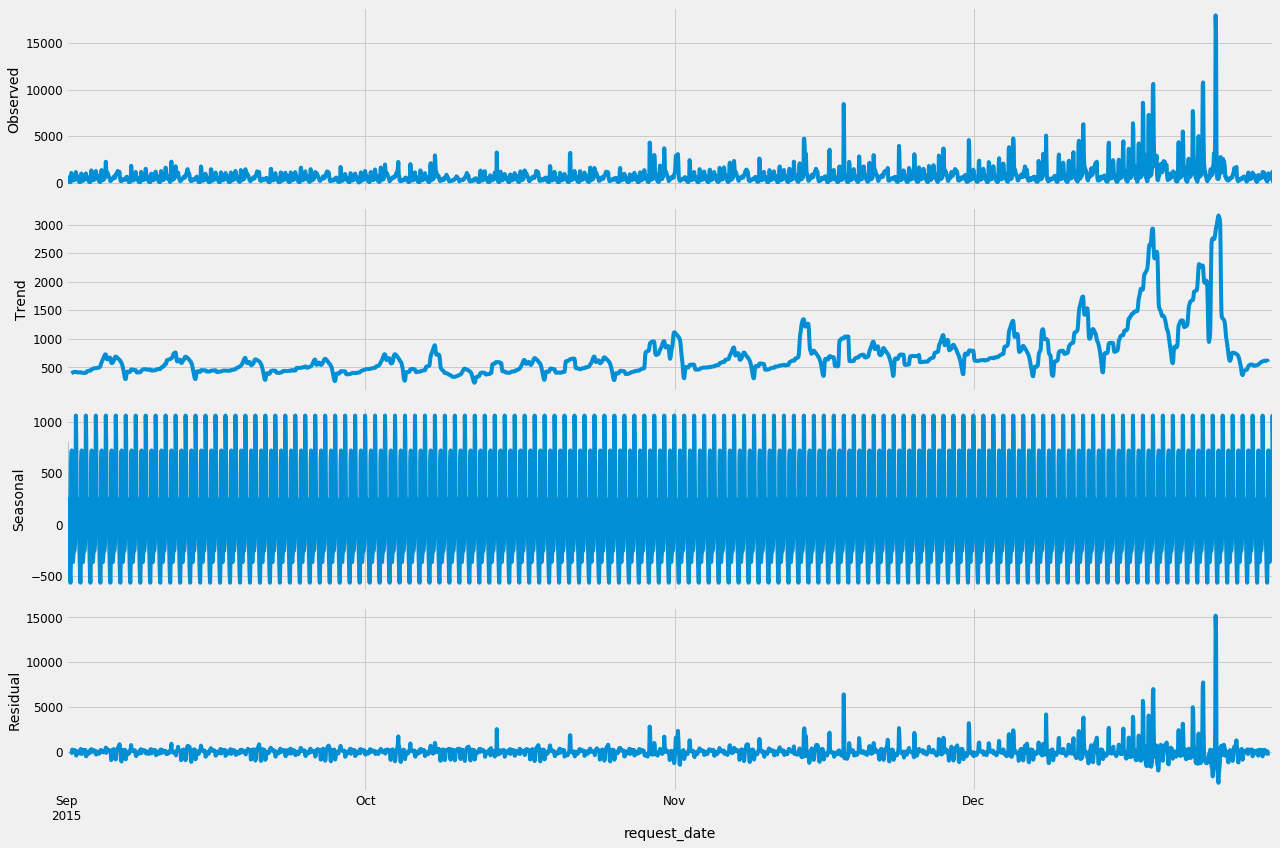

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 12
plt.style.use('fivethirtyeight')
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
decomposition = sm.tsa.seasonal_decompose(dt_agg1hour, model='additive')
fig = decomposition.plot()
plt.show()